In [136]:
# Packages
using DiffEqParamEstim
using DifferentialEquations
using Optim
using LinearAlgebra
using Plots;pyplot()

Plots.PyPlotBackend()

In [124]:
# Optimization using Julia
# ODE function
function f(du,u,p,t)
  du[1] = dx = p[1]*u[1] - u[1]*u[2]
  du[2] = dy = -3*u[2] + p[2]*u[1]*u[2]
end

u0 = [1.0;1.0]
tspan = (0.0,10.0)
p = [1.5,1.]
prob = ODEProblem(f,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

In [125]:
sol = solve(prob,Tsit5())
t = collect(range(0,step=0.05,stop=10))
using RecursiveArrayTools # for VectorOfArray
randomized = VectorOfArray([(sol(t[i]) + .01randn(2)) for i in 1:length(t)])
data = convert(Array,randomized)

2×201 Array{Float64,2}:
 1.00869   1.03303   1.06286   1.1195    …  0.986619  0.99286  1.03968 
 0.995571  0.891464  0.814119  0.747653     1.0949    1.0137   0.915184

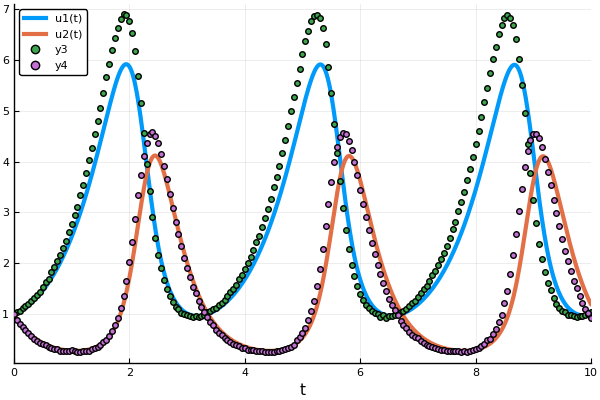

In [129]:
p = [1.42,1.1]
prob = ODEProblem(f,u0,tspan,p)
sol = solve(prob,Tsit5())
plot(sol)
plot!(t,data',st=:scatter)

In [134]:
cost_function = build_loss_objective(prob,Tsit5(),L2Loss(t,data),
                                     maxiters=10000,verbose=false)
using Optim
result = optimize(cost_function, Fminbox())

MethodError: MethodError: no method matching optimize(::DiffEqObjective{getfield(DiffEqParamEstim, Symbol("##29#34")){Nothing,Bool,Int64,typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR),Base.Iterators.Pairs{Symbol,Integer,Tuple{Symbol,Symbol},NamedTuple{(:maxiters, :verbose),Tuple{Int64,Bool}}},ODEProblem{Array{Float64,1},Tuple{Float64,Float64},true,Array{Float64,1},ODEFunction{true,typeof(f),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},Nothing,DiffEqBase.StandardODEProblem},Tsit5,L2Loss{Array{Float64,1},Array{Float64,2},Nothing,Nothing,Nothing},Nothing},getfield(DiffEqParamEstim, Symbol("##33#39"))}, ::Fminbox{LBFGS{Nothing,LineSearches.InitialStatic{Float64},LineSearches.HagerZhang{Float64,Base.RefValue{Bool}},getfield(Optim, Symbol("##22#24"))},Float64,getfield(Optim, Symbol("##46#48"))})
Closest candidates are:
  optimize(::Any, ::Any, !Matched::AbstractArray{T<:AbstractFloat,N} where N, !Matched::AbstractArray{T<:AbstractFloat,N} where N, !Matched::AbstractArray{T<:AbstractFloat,N} where N) where T<:AbstractFloat at C:\Users\pande\.julia\packages\Optim\Agd3B\src\multivariate\solvers\constrained\fminbox.jl:150
  optimize(::Any, ::Any, !Matched::AbstractArray{T<:AbstractFloat,N} where N, !Matched::AbstractArray{T<:AbstractFloat,N} where N, !Matched::AbstractArray{T<:AbstractFloat,N} where N, !Matched::Fminbox) where T<:AbstractFloat at C:\Users\pande\.julia\packages\Optim\Agd3B\src\multivariate\solvers\constrained\fminbox.jl:150
  optimize(::Any, ::Any, !Matched::AbstractArray{T<:AbstractFloat,N} where N, !Matched::AbstractArray{T<:AbstractFloat,N} where N, !Matched::AbstractArray{T<:AbstractFloat,N} where N, !Matched::Fminbox, !Matched::Any; inplace, autodiff) where T<:AbstractFloat at C:\Users\pande\.julia\packages\Optim\Agd3B\src\multivariate\solvers\constrained\fminbox.jl:150
  ...

In [137]:
p = result.minimizer
prob = ODEProblem(f,u0,tspan,p)
sol = solve(prob,Tsit5())
plot(sol)
plot!(t,data',st=:scatter)

BoundsError: BoundsError

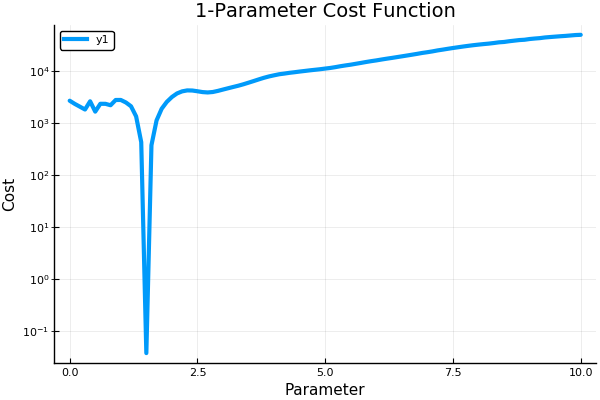

In [49]:
vals = 0.0:0.1:10.0
using Plots; pyplot()
plot(vals,[cost_function(i) for i in vals],yscale=:log10,
     xaxis = "Parameter", yaxis = "Cost", title = "1-Parameter Cost Function",
     lw = 3)

In [119]:
dt = 0.05
p = [1.]
# custom cost_function
function cost(p,f_r,u0_r,tspan_r,dt_r,data_r)
    prob = ODEProblem(f_r,u0_r,tspan_r,p)
    sol = solve(prob, saveat=dt_r)
    sim = reduce(hcat,sol.u)
    return norm(sim-data_r,2)^2/length(sim)
end

cost (generic function with 1 method)

In [120]:
# Initial value of loss function
loss = (p) -> cost(p,f,u0,tspan,dt,data)

#49 (generic function with 1 method)

In [121]:
res = optimize(loss,[0.5],[2.],p,Fminbox(GradientDescent()))

Results of Optimization Algorithm
 * Algorithm: Fminbox with Gradient Descent
 * Starting Point: [1.0]
 * Minimizer: [1.5000416244539962]
 * Minimum: 9.386066e-05
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 6.51e-09 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 9.05e-11 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 1.53e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 55
 * Gradient Calls: 55

In [122]:
res.minimizer

1-element Array{Float64,1}:
 1.5000416244539962